# Reducción de dimensionalidad

# Qué es? Por qué? Cuándo?

**Es la transformación de los datos desde un espacio de altamente dimensional a uno con pocas dimensiones, conservando algunas propiedades significativas y útiles de los datos originales**

- Poder **visualizar** información que tiene **demasiadas columnas** como para ser visualizada (reducir dimensiones mayores a 3, a algo de 1, 2 o 3 dimensiones).

- Utilizar modelos que no funcionan bien con muchas dimensiones

- **Acelerar** algoritmos de machine learning que usen esta data, y reducir sus **requerimientos de hardware** (menos columnas -> menos cálculos -> menos tiempo y memoria)

- Reducir **overfitting**

![](files/images/ml_process.svg)

### Feature selection vs Feature projection

* Feature selection: se eligen algunas features del dataset original
* Feature projection: se generan features nuevas a partir de las originales (en esto nos vamos a concentrar) 

 * Lineales 
 * No lineales

<!-- ![](files/images/pca_isomap.jpg) -->
<div><img src="./images/pca.png" width="40%" style="float: left; margin: 10px;" align="middle"></div>
<div><img src="./images/umap.png" width="50%" style="float: right; margin: 10px;" align="middle"></div>

## Noción básica

![](files/images/dim_reduction_1.svg)

![](files/images/dim_reduction_2.svg)

![](files/images/dim_reduction_3.svg)

Las nuevas dimensiones no son **ninguna de las columnas originales**. Tienen un nuevo significado.

En el ejemplo: no nos quedamos con X o con Y, inventamos dos nuevos nuevos ejes!

Y uno de esos ejes, pareciera tener **poca información**... así que podríamos descartarlo!

![](files/images/dim_reduction_4.svg)

Se **pierde información**. Nosotros debemos evaluar el trade off.

Algunos de estos algoritmos permiten decidir de forma fácil **cuánta información perder vs cuántas dimensiones reducir** (ej: PCA).

En el ejemplo redujimos de 2 dimensiones originales, a 1 dimensión inventada. Estos algoritmos permiten ir de N a [algo menor o igual que N] dimensiones. Ej: de 20 a 3 dimensiones, etc.

Por lo general, cuantas más dimensiones reducimos, **más información perdemos**.

# Dimensionality Reduction: Principal Component Analysis (PCA)

Es un algoritmo que permite hacer dimensionality reduction.

No vamos a ver el trasfondo matemático, pero es bueno mencionarlo porque es **uno de los mas conocidos**, y simple con ScikitLearn:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print("Importancias de las nuevas dimensiones:", pca.explained_variance_ratio_)  
nX = pca.transform(X)

Importancias de las nuevas dimensiones: [0.99244289 0.00755711]


# T-Sne, Umap

* No-lineales
* T-SNE es util para graficar pero no tanto para hacer análisis (no asegura preservar bien las distancias y densidades)
* UMAP hace algunas asumpciones acerca de las distribuciones de los datos, pero preserva mejor las estructuras globales

![](files/images/tsne_umap.png)

In [10]:
# !pip install umap-learn

In [7]:
from sklearn import datasets
from umap import UMAP

def plot_data(data, labels=None, title=None, legend=True, centroids=None):
    plt.figure(figsize=(7,5), dpi=100)
    if labels is not None:
        if isinstance(labels, list):
            labels = np.array(labels)

        unique_labels = list(sorted(set(x for x in labels if str(x) != '-1')))
        labels = np.array(list(map(str, labels)))
        if '-1' in labels:
            plt.scatter(data[labels=='-1', 0], data[labels=='-1', 1], s=5, c='black', alpha=0.5)


        for i, label in enumerate(unique_labels):
            label = str(label)
            plt.scatter(data[labels==label, 0], data[labels==label, 1], s=5, c='C{}'.format(i),
                        cmap='viridis', label=label, alpha=0.5)

            if centroids is not None:
                plt.scatter(centroids[i, 0], centroids[i, 1], s=250, c='white', marker='o')
                plt.scatter(centroids[i, 0], centroids[i, 1], s=100, marker='X')

        if legend:
            plt.legend(fontsize=10, markerscale=3, loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.scatter(data[:, 0], data[:, 1], s=5, color='grey', alpha=0.5)

    if title:
        plt.title(title)
    plt.axis('off')


def load_mnist(size):
    np.random.seed(42)
    X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
    sample_index = np.random.choice(list(range(len(X))), size=size, replace=False)
    digits_X = X[sample_index]
    digits_y = y[sample_index]
    return digits_X, digits_y

### Ejemplo MNIST

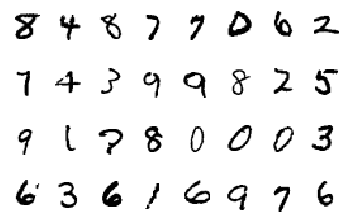

In [8]:
digits_X, digits_y = load_mnist(30_000)

for index, (image, label) in enumerate(zip(digits_X[:32], digits_y[:32])):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')

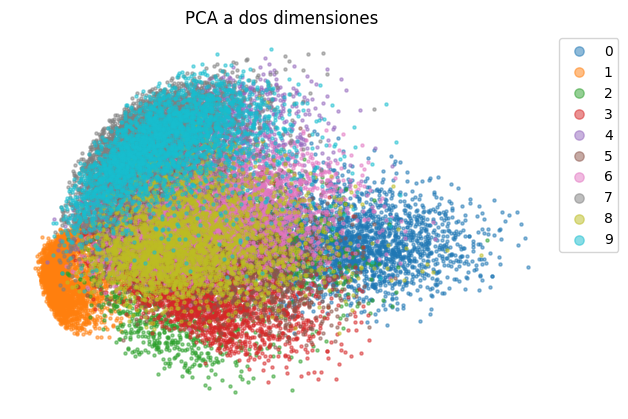

In [9]:
emb = PCA(n_components=2).fit_transform(digits_X)
plot_data(emb, labels=digits_y, title='PCA a dos dimensiones')

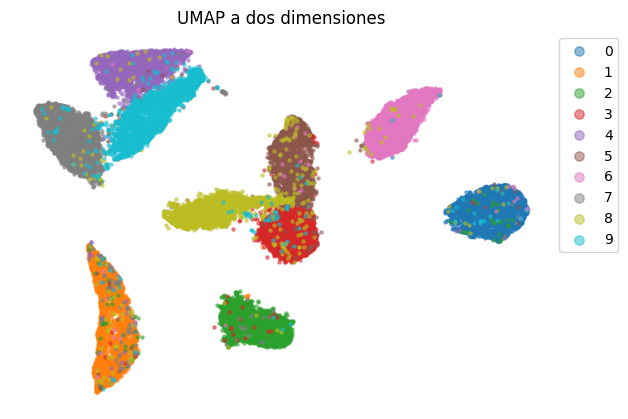

In [11]:
emb = UMAP().fit_transform(digits_X)
plot_data(emb, labels=digits_y, title='UMAP a dos dimensiones')